In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
path = 'traindats.csv'
data = pd.read_csv(path)
data = data.sample(frac = 1)
data.head()

,PulseNo,TotalArea,TailArea,Classification
14790,14791,1048,528,Gamma
54239,54240,7408,4520,Neutron
46759,46760,3712,1860,Neutron
42942,42943,7344,3276,Gamma
38908,38909,1288,600,Gamma


In [34]:
from sklearn.preprocessing import LabelEncoder
lab_encod = LabelEncoder()
data['Classification_encod'] = lab_encod.fit_transform(data['Classification'])
data = data.drop(['Classification'],axis = 'columns')
data.head()

,PulseNo,TotalArea,TailArea,Classification_encod
14790,14791,1048,528,0
54239,54240,7408,4520,1
46759,46760,3712,1860,1
42942,42943,7344,3276,0
38908,38909,1288,600,0


In [4]:
data.describe()

,PulseNo,TotalArea,TailArea,Classification_encod
count,58121.000000,58121.000000,58121.000000,58121.000000
mean,29061.000000,3117.004112,1576.998039,0.256534
std,16778.231835,2700.726389,1460.522697,0.436724
min,1.000000,320.000000,96.000000,0.000000
25%,14531.000000,1120.000000,556.000000,0.000000
50%,29061.000000,1968.000000,952.000000,0.000000
75%,43591.000000,4400.000000,2188.000000,1.000000
max,58121.000000,23270.000000,14714.000000,1.000000


In [5]:
x1 = data['TotalArea']
x2 = data['TailArea']
y = data['Classification_encod']

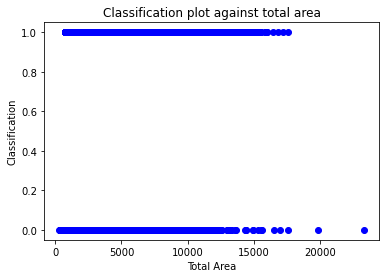

In [6]:
#plot of classification against total area
plt.scatter(x1,y,color = 'blue')
plt.xlabel('Total Area')
plt.ylabel('Classification')
plt.title('Classification plot against total area')
plt.show()

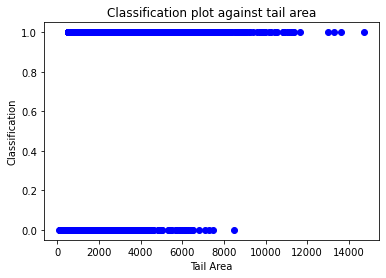

In [7]:
#plot of classification against tail area
plt.scatter(x2,y,color = 'blue')
plt.xlabel('Tail Area')
plt.ylabel('Classification')
plt.title('Classification plot against tail area')
plt.show()

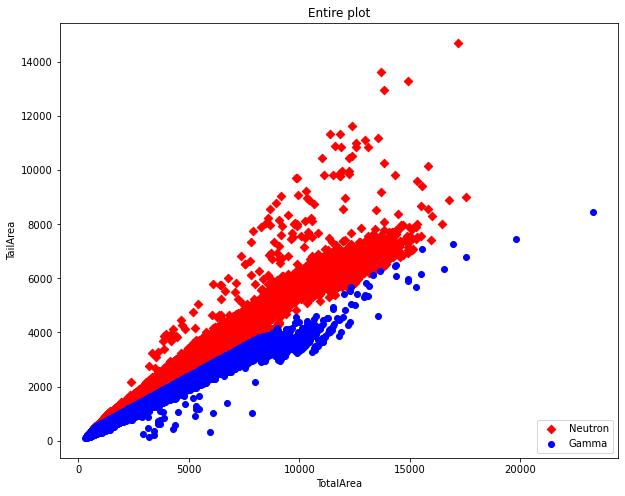

In [8]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.scatter(data['TotalArea'][data.Classification_encod==1],
            data['TailArea'][data.Classification_encod==1],
            marker = 'D',
            color = 'red',
            label = 'Neutron')
plt.scatter(data['TotalArea'][data.Classification_encod==0],
            data['TailArea'][data.Classification_encod==0],
            marker = 'o',
            color = 'blue',
            label = 'Gamma')
plt.xlabel('TotalArea')
plt.ylabel('TailArea')
plt.title('Entire plot')
plt.legend(loc = 'lower right')
plt.show()

In [9]:
#Classification  using Logistic Regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
x = data.iloc[:,1:]
x = x.drop(['Classification_encod'],axis = 'columns')
y = data.iloc[:,-1]
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x,columns = ['TotalArea','TailArea'])
x = x.values
y = y.values

In [10]:
print(x.shape)
print(y.shape)

(58121, 2)
(58121,)


In [11]:
print(x[:10])

[[-7.57211731e-01 -6.82636852e-01]
 [-7.39438582e-01 -8.00403922e-01]
 [-5.79480240e-01 -5.12833168e-01]
 [-8.63850626e-01 -7.67538693e-01]
 [-8.90510350e-01 -8.14097768e-01]
 [ 6.43904860e-01  9.46930755e-01]
 [ 3.09177218e-01 -6.83349299e-04]
 [ 7.81262789e-02  4.31369561e-02]
 [ 2.97218740e+00  3.19546017e+00]
 [-2.41790406e-01 -4.00543636e-01]]


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,
                                                 random_state = 42)
print("Training data shape",x_train.shape)
print("Test data shape",x_test.shape)

Training data shape (43590, 2)
Test data shape (14531, 2)


In [13]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train.ravel())
y_pred = log_reg.predict(x_test)
print(y_pred[:10])

[0 0 0 0 0 1 0 1 0 0]


In [14]:
print(type(y_pred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy",accuracy)

Accuracy 0.968825270112174


In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[10795     5]
 [  448  3283]]


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11243
           1       0.88      1.00      0.94      3288

    accuracy                           0.97     14531
   macro avg       0.94      0.98      0.96     14531
weighted avg       0.97      0.97      0.97     14531



In [18]:
y_prob_train = log_reg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)
print(y_prob_train[:20])

[4.27574164e-04 1.00000000e+00 1.00000000e+00 5.51532853e-05
 7.02354444e-03 1.30760902e-02 9.99992173e-01 3.86595180e-03
 7.38509632e-03 1.00000000e+00 1.00000000e+00 4.05920342e-03
 3.51254820e-03 1.78622413e-12 4.57706310e-03 7.52525189e-03
 1.21385495e-01 4.45068503e-01 1.80772253e-02 2.49992740e-03]


In [19]:
y_prob_test = log_reg.predict_proba(x_test)[:,1]
y_prob_test.reshape(1,-1)
print(y_prob_test[:20])

[1.58504063e-02 5.97299420e-03 4.99236655e-01 2.86779986e-02
 4.69972050e-02 1.00000000e+00 2.27669918e-02 9.99999910e-01
 6.24137130e-03 8.68666793e-05 9.99999958e-01 6.16649793e-02
 7.74204513e-04 5.90922823e-02 2.61660980e-03 3.59376976e-03
 9.99997815e-01 1.01365418e-01 7.21864507e-02 7.65887296e-03]


In [20]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds = roc_curve(y_train,y_prob_train)
roc_auc = auc(fpr,tpr)

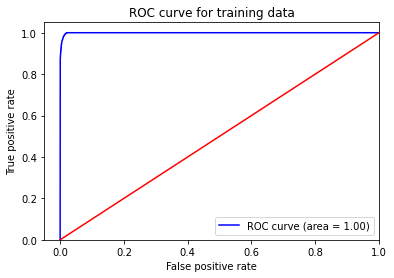

In [21]:
plt.figure()
plt.plot(fpr,tpr,color='blue',label = 'ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'red')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC curve for training data")
plt.legend(loc = 'lower right')
plt.show()

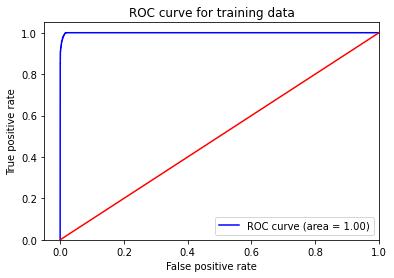

In [22]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='blue',label = 'ROC curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'red')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("ROC curve for training data")
plt.legend(loc = 'lower right')
plt.show()

In [23]:
fpr,tpr,thresholds = roc_curve(y_test,y_prob_test)
indices = np.arange(len(fpr))
df_roc = pd.DataFrame({'fpr':pd.Series(fpr,indices),'tpr':pd.Series(tpr,indices),
                       '1-fpr':pd.Series(1-fpr,indices),
                       'tf':pd.Series(tpr-(1-fpr),indices),
                       'thresholds':pd.Series(thresholds,indices)})
df_roc.head()

,fpr,tpr,1-fpr,tf,thresholds
0,0.0,0.000000,1.0,-1.000000,2.0
1,0.0,0.055749,1.0,-0.944251,1.0
2,0.0,0.067810,1.0,-0.932190,1.0
3,0.0,0.072367,1.0,-0.927633,1.0
4,0.0,0.077995,1.0,-0.922005,1.0


In [24]:
df_roc.iloc[(df_roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
413,0.011852,0.987939,0.988148,-0.000209,0.314216


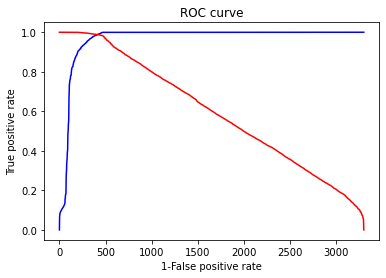

In [25]:
fig,ax = plt.subplots()
plt.plot(df_roc['tpr'],color = 'blue')
plt.plot(df_roc['1-fpr'],color = 'red')
plt.xlabel('1-False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [26]:
#Classification using optimal threshold value
from sklearn.preprocessing import binarize
opt_thresh = 0.31621
y_pred = binarize(y_prob_test.reshape(1,-1), opt_thresh)[0]
print(y_pred[:20])

[0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.31621 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [27]:
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[10674   126]
 [   51  3680]]


In [28]:
classification_repo = classification_report(y_test,y_pred)
print(classification_repo)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10800
           1       0.97      0.99      0.98      3731

    accuracy                           0.99     14531
   macro avg       0.98      0.99      0.98     14531
weighted avg       0.99      0.99      0.99     14531



In [29]:
accuracy_logit = accuracy_score(y_pred,y_test)
print("Accuracy Score using Logistic Regression",accuracy_logit)

Accuracy Score using Logistic Regression 0.9878191452756176
